In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Регрессия

In [2]:
from sklearn.datasets import fetch_california_housing

# Загрузка данных
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.DataFrame(california_housing.target, columns=["Target"])

# Вывод первых 5 строк датасета
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [62]:
X.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [63]:
X.sample(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12710,2.8000,34.0,4.585657,0.932271,563.0,2.243028,38.59,-121.39
12374,3.3799,6.0,10.860423,2.036020,4176.0,1.880234,33.78,-116.36
7179,1.5500,36.0,2.701046,0.941704,2118.0,3.165919,34.04,-118.18


### EDA анализ данных

In [64]:
X.describe().T # Статистика

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


In [65]:
X.info() # Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


Лучше понять природу данных нам помогут следующие типы графиков:

1. **Гистограммы** для каждой характеристики, чтобы увидеть распределение значений.
2. **Ящик с усами (Boxplot)** для оценки распределения и наличия выбросов.
3. **Точечная диаграмма (Scatter plot)** для анализа взаимосвязи между признаками (Х) и целевой переменной (у).
4. **Тепловая карта корреляций (Heatmap of correlations)** для изучения взаимосвязи признаков между собой.

Есть и другие (в документации Matplotlib), вы можете поэксперементировать с их выводом

<Axes: >

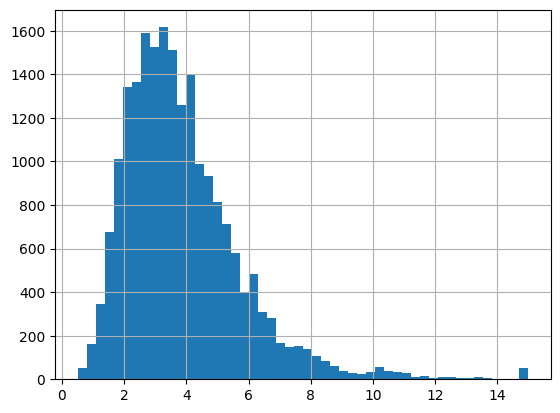

In [66]:
X['MedInc'].hist(bins=50) # Графики внутри пандаса

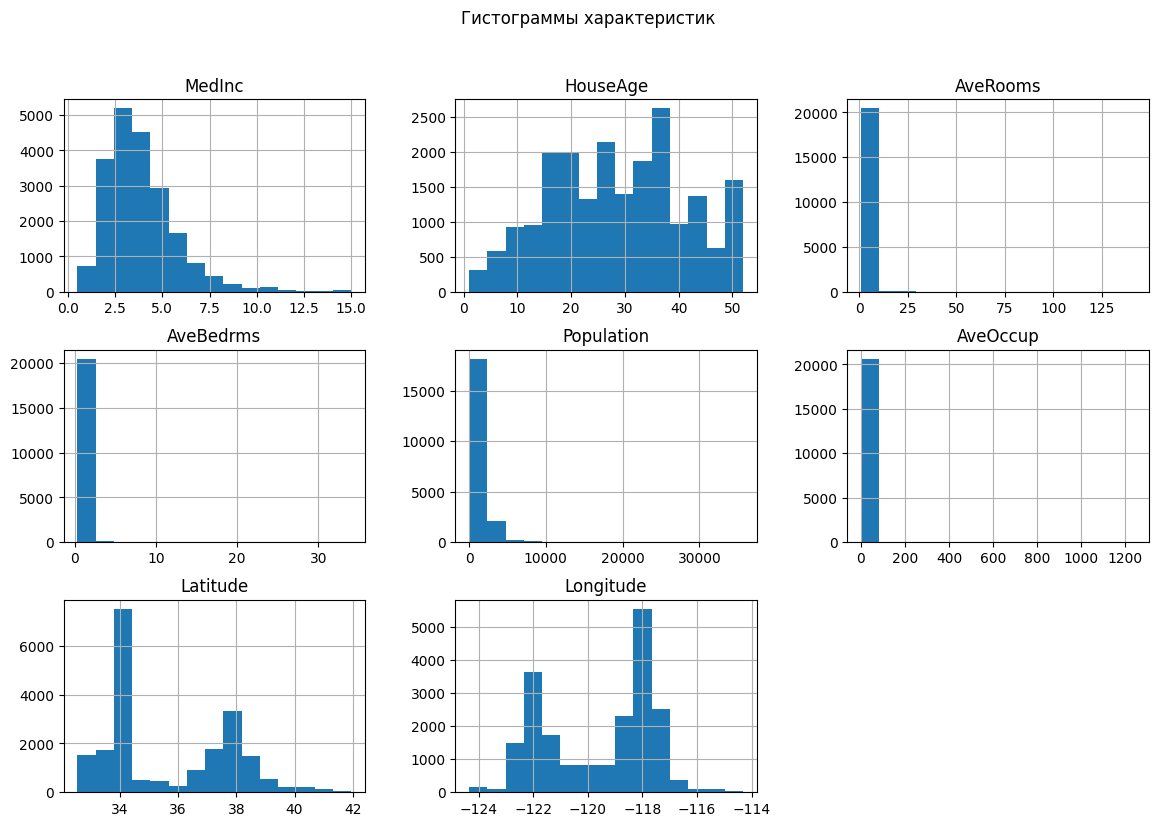

In [67]:
# ==================== Графики на матплотлибе ====================
# Гистограммы
X.hist(bins=15, figsize=(14, 9), layout=(3, 3))
plt.suptitle('Гистограммы характеристик')
plt.show()

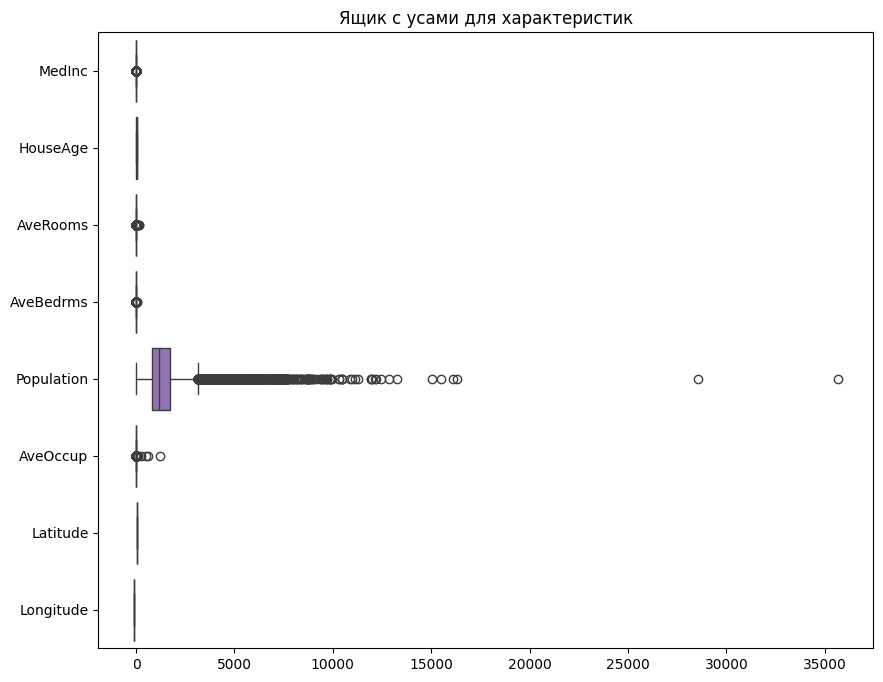

In [68]:
# Ящик с усами
plt.figure(figsize=(10, 8))
sns.boxplot(data=X, orient='h')
plt.title('Ящик с усами для характеристик')
plt.show()

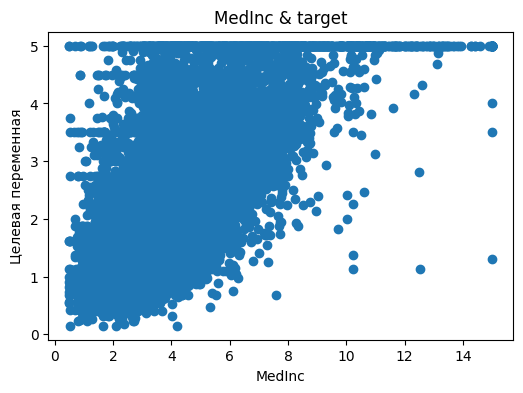

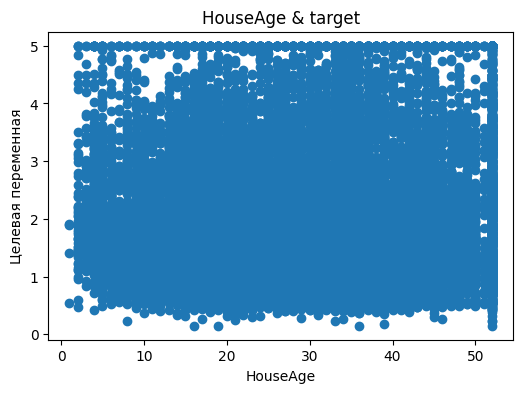

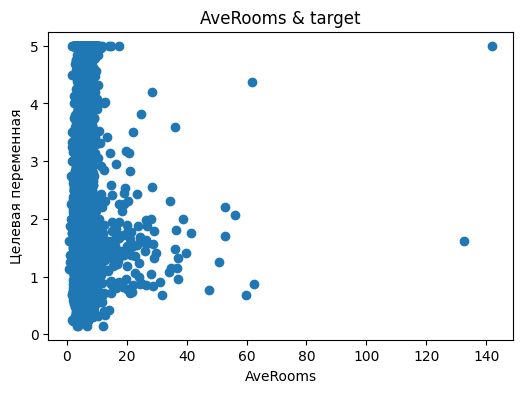

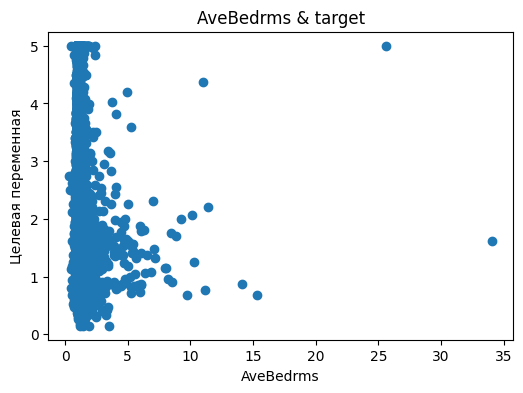

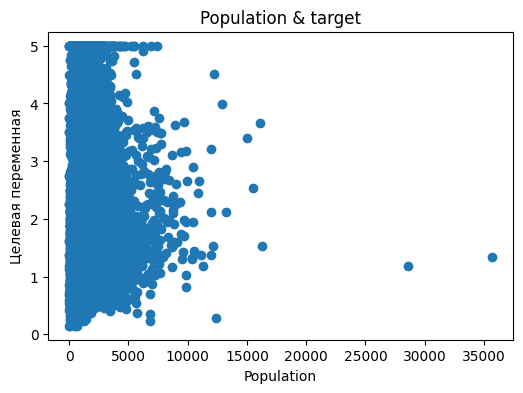

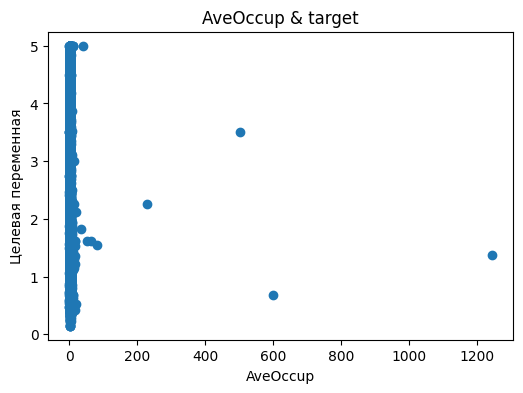

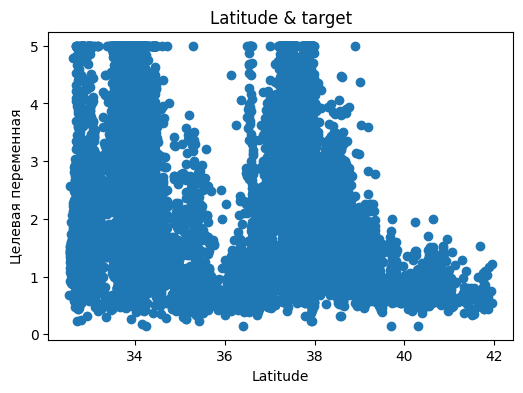

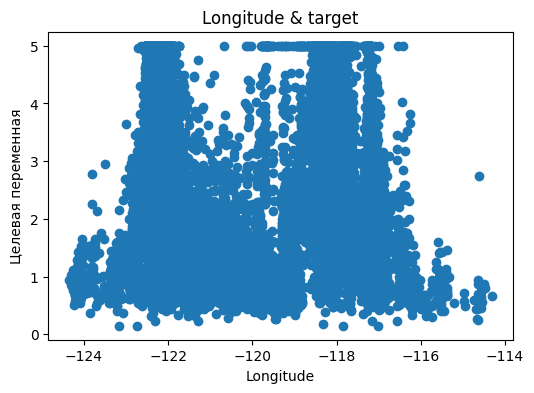

In [69]:
# Точечная диаграмма
for feature in california_housing.feature_names:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[feature], y)
    plt.title(f'{feature} & target')
    plt.xlabel(feature)
    plt.ylabel('Целевая переменная')
    plt.show()

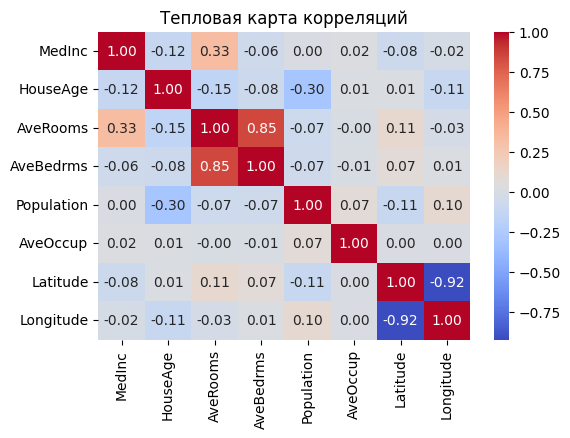

In [70]:
# Тепловая карта корреляций
plt.figure(figsize=(6, 4))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Тепловая карта корреляций')
plt.show()

### Обучение на Keras

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Загрузка и подготовка данных
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = MinMaxScaler() # Нормализация
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5151 - val_loss: 0.6497
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5716 - val_loss: 0.5713
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5441 - val_loss: 0.5512
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5509 - val_loss: 0.5326
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5367 - val_loss: 0.5251
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5006 - val_loss: 0.5484
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4918 - val_loss: 0.5115
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4855 - val_loss: 0.5268
Epoch 9/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4969 - val_loss: 0.5027
Epoch 10/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4911 - val_loss: 0.5007


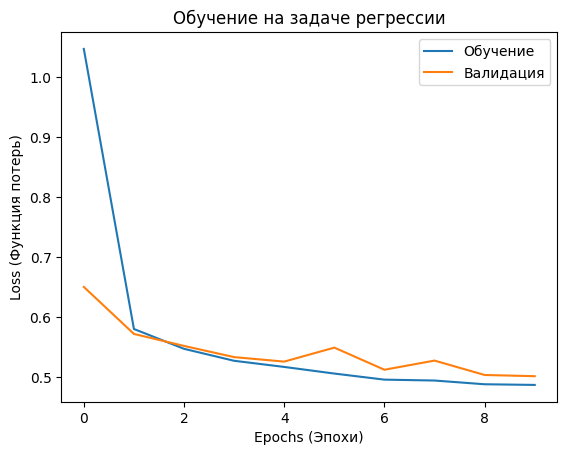

In [72]:
# График обучения
plt.plot(history.history['loss'], label='Обучение')
plt.plot(history.history['val_loss'], label='Валидация')
plt.title('Обучение на задаче регрессии')
plt.xlabel('Epochs (Эпохи)')
plt.ylabel('Loss (Функция потерь)')
plt.legend()
plt.show()

In [73]:
# Оценка модели на тестовых данных
test_loss = model.evaluate(X_test, y_test)
print(f"Метрика средней квадратичной ошибки (MSE): {test_loss}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4930
Метрика средней квадратичной ошибки (MSE): 0.4922979772090912


## Классификация

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
from sklearn.datasets import load_iris

# Загрузка данных Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["Target"])

# Вывод первых пяти строк датасета
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Обучение на PyTorch

In [76]:
import torch
from sklearn.model_selection import train_test_split

# Преобразование данных в тензоры PyTorch
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.long)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [77]:
from torch.utils.data import DataLoader, TensorDataset

# Создание DataLoader для обучающей и тестовой выборки
train_dataset = TensorDataset(X_train, y_train.view(-1))
test_dataset = TensorDataset(X_test, y_test.view(-1))

train_loader = DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

In [78]:
import torch.nn as nn

# Создание модели
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 3)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [79]:
import torch.optim as optim
from tqdm import tqdm


model = IrisNet()
# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss() # CrossEntropyLoss в PyTorch автоматически применяет softmax к выходным данным модели перед вычислением потерь
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 100
train_losses = []
test_losses = []

for epoch in tqdm(range(num_epochs)):
    # для обучающих данных
    model.train()
    train_loss = 0.0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.view(-1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_loader.dataset))

    # для тестовых данных
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            loss = criterion(output, target.view(-1))
            test_loss += loss.item()
    test_losses.append(test_loss / len(test_loader.dataset))

100%|██████████| 100/100 [00:11<00:00,  8.61it/s]


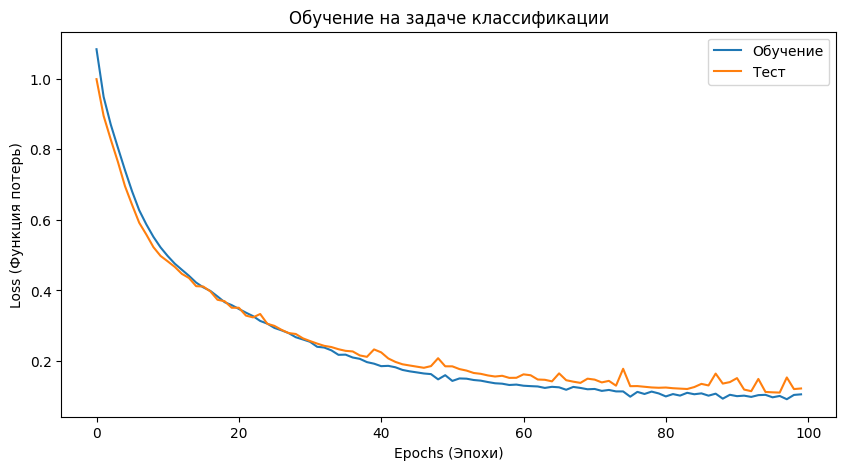

In [80]:
# Визуализация результатов обучения
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Обучение')
plt.plot(test_losses, label='Тест')
plt.title('Обучение на задаче классификации')
plt.xlabel('Epochs (Эпохи)')
plt.ylabel('Loss (Функция потерь)')
plt.legend()
plt.show()

In [81]:
from sklearn.metrics import accuracy_score

# Получение предсказаний от модели
y_pred = []
y_true = []
model.eval()
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(target.numpy())

# Расчет метрик
accuracy = accuracy_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9667
